---
# 🔥🗺️Visualization of heatmaps along chromosome arm

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
## input parameters
chromosome='1'
arm='p'
test=False
# test=True
input_dir_path='inputs'
output_dir_path='outputs'

In [3]:
## set the current directory to 'examples'
import os
if len(set(['chrov','examples','tests']) - set(os.listdir('.')))==0:
    ## change the current directory from 'chrov' to 'examples'
    os.chdir('./examples')

In [4]:
if test:
    import logging
    logging.basicConfig(level=logging.INFO)

**Demo data**

In [5]:
# cytobands to plot the chromosome
cytobands=pd.read_table(f'{input_dir_path}/cytobands.tsv',index_col=[0]).query(expr=f"`chromosome` == '{chromosome}' & `arm` == '{arm}'")
cytobands.head(1)

,chromosome,p start,q end,start,end,cytoband,cytoband type,arm,chromosome arm
0,1,121700001,125100000,1,2300000,p36.33,gneg,p,chr1p


In [6]:
data=pd.DataFrame({'gene symbol': ['DCAF16', 'TEC', 'MXD4', 'TLR10', 'POLN', 'ZNF721', 'CTBP1', 'OTOP1', 'ZBTB49', 'SMIM14', 'IDUA', 'SLBP', 'TMEM156', 'DRD5', 'KCTD8', 'MYL5', 'RNF212', 'GABRG1', 'SHISA3', 'SLAIN2'], 'gene start': [17800655, 48135783, 2247432, 38772238, 2071918, 425815, 1211445, 4188726, 4290251, 39546336, 986997, 1692731, 38966744, 9781634, 44173903, 673580, 1056250, 46035769, 42397488, 48341529], 'gene id': ['ENSG00000163257', 'ENSG00000135605', 'ENSG00000123933', 'ENSG00000174123', 'ENSG00000130997', 'ENSG00000182903', 'ENSG00000159692', 'ENSG00000163982', 'ENSG00000168826', 'ENSG00000163683', 'ENSG00000127415', 'ENSG00000163950', 'ENSG00000121895', 'ENSG00000169676', 'ENSG00000183783', 'ENSG00000215375', 'ENSG00000178222', 'ENSG00000163285', 'ENSG00000178343', 'ENSG00000109171'], 'gene end': [17810758, 48269838, 2262109, 38782990, 2242121, 499156, 1250333, 4226929, 4321786, 39638902, 1004564, 1712344, 39032922, 9784009, 44448809, 682028, 1113564, 46124054, 42402487, 48426201], 'feature4': [0.9978415737204072, 0.4545855939302902, 0.8573880517430308, 0.5369694154703196, 0.4457115449195024, 0.9765010037492002, 0.7076748305942623, 0.7249182689441283, 0.8556377476044005, 0.03310947281449672, 0.7976369417420842, 0.4143486090921996, 0.3150593948939062, 0.8596323398233959, 0.46504636110657616, 0.6789853107280641, 0.2978882296072487, 0.6359111145039221, 0.7810018812278806, 0.25627277183171904], 'feature3': [0.3566935974431962, 0.04823230413616064, 0.026306275635885723, 0.8506035236781101, 0.12397957830307027, 0.09622607852088605, 0.7510194295771837, 0.28532642279486886, 0.9077930496933677, 0.30597152430412267, 0.3125346095450551, 0.1318426530402026, 0.32218397914740515, 0.048972675187913595, 0.71018128846817, 0.3520131563850356, 0.7604625247363084, 0.6746375970484595, 0.2962249547560276, 0.5557764813821117], 'feature2': [0.41994505200469723, 0.49899410085102647, 0.04966002877825171, 0.2882714372027311, 0.12530940800497614, 0.9778505913257984, 0.5091710702451585, 0.11184212564565776, 0.7332539588514982, 0.2619236934962125, 0.2447293909158732, 0.11340833322232813, 0.09392775765398509, 0.8138133036751269, 0.8988200952204632, 0.3292719158968931, 0.4054109255542675, 0.4887042617664549, 0.6935745073377755, 0.3945997530158041], 'feature1': [0.9442146414428945, 0.029169687972744884, 0.658979746729614, 0.5136194713696834, 0.8243893393455316, 0.010312310246625378, 0.17856679646501383, 0.5393365344217116, 0.373158202003001, 0.7789524371639759, 0.9355711390777366, 0.30994562834493466, 0.5947124442716721, 0.8072087291309447, 0.7809503381629245, 0.25137092436557207, 0.804851285119722, 0.23192222823325437, 0.3336109658037789, 0.38825792686583227], 'expression': [10.826515598126914, 0.1732662403804863, 4.865983483487643, 6.792936088719567, 1.834804743239546, 12.952176820967551, 3.829768844147359, 6.457107943577316, 11.826325191122624, 11.784126621228086, 3.741973500259156, 11.221591806005003, 7.454615664513031, 4.620759600761383, 12.539226926086789, 5.440683683397464, 3.4207894585662526, 5.191982474146752, 8.708856972210224, 6.214336020716142], 'differential expression': [-3.4612499064035385, -3.208411823312507, -3.6856203104882046, -0.4948295622771379, -1.0167383420666098, 2.705781166527648, 1.3765674513286346, 1.8006900116463438, -1.1384579302765072, 2.5552288478319385, -2.4935532760477463, -1.879328453252897, 4.874562898886824, -2.5620866243460902, 4.715983364054573, 0.3926466168302109, 2.012265168759974, -3.710401016265068, -2.485234955358937, -3.647425207312329]})
data.head(1)

,gene symbol,gene start,gene id,gene end,feature4,feature3,feature2,feature1,expression,differential expression
0,DCAF16,17800655,ENSG00000163257,17810758,0.997842,0.356694,0.419945,0.944215,10.826516,-3.46125


## Input table

In [7]:
df1=(
    data
    .sort_values('gene start').reset_index(drop=True)
     .assign(
     **{
         'genome coordinate mean':lambda df: df.loc[:,['gene start','gene end']].mean(axis=1),
         'heatmap x':lambda df: df.index+1,
         'gene symbol label':lambda df: df['gene symbol'].apply(lambda x: f"${x}$"),
     }    
     )
)
df1.head(1)

,gene symbol,gene start,gene id,gene end,feature4,feature3,feature2,feature1,expression,differential expression,genome coordinate mean,heatmap x,gene symbol label
0,ZNF721,425815,ENSG00000182903,499156,0.976501,0.096226,0.977851,0.010312,12.952177,2.705781,462485.5,1,$ZNF721$


## Plot

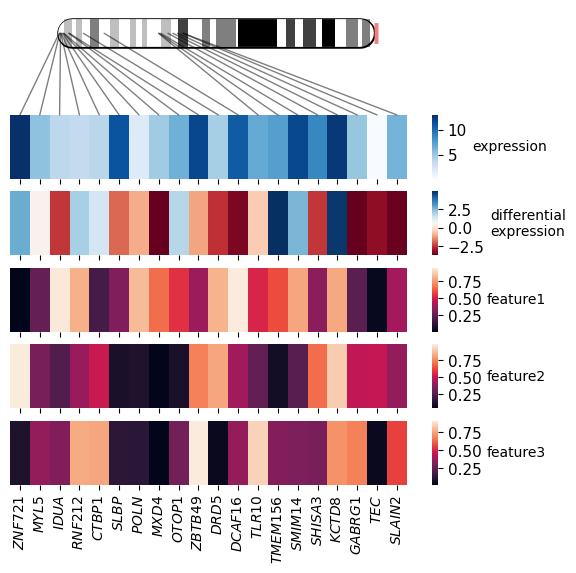

In [8]:
from chrov.viz.plot import heatmaps_strips
fig,axs=heatmaps_strips(
    df1,
    strips_kws={
        'expression': { # column name in the table
            'cmap':'Blues', # colormap
        },
        'differential expression': { # column name in the table
            'cmap':'RdBu', # colormap
        },
        'feature1': { # column name in the table
        },
        'feature2': { # column name in the table
        },
        'feature3': { # column name in the table
        },
        
    },
)
## show chromosome arm
ax=fig.add_axes([0.2,1,0.5,0.1])
from chrov.viz.chrom import plot_arm
plot_arm(
    cytobands,
    y=0,
    lw=20,
    ax=ax,
    ec='k',
    test=False,
).axis(False)
ax.set_zorder(-1)
## annotations
from matplotlib.patches import ConnectionPatch
_=df1.apply(lambda x:  fig.add_artist(
    ConnectionPatch(
        xyA=[x['heatmap x']-0.5,0], 
        xyB=[x['genome coordinate mean'],0], 
        coordsA=axs[0].transData,#"data", 
        coordsB=ax.transData,#"data",
        # axesA=axs[0],
        # axesB=ax,
        color="k",
        alpha=0.5,
        zorder=2,
        clip_on=False
    ),
),
axis=1)
# plt.savefig(f"{output_dir_path}/arm_linear_heatmaps.png",bbox_inches='tight')